<a href="https://colab.research.google.com/github/PMwango/PMwango/blob/main/Data_Exploration_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
df = pd.read_csv('/content/Loan_prediction_dataset (1).csv')
df.head()

#Check the last 5 records
df.tail()

#Data info
df.info()

df.describe() #displays numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
# Filter through our data
# df.loc[df['Gender'] == 'Male']
# df_filtered = df.query('Gender == "Female" and Education == "Graduate" and Loan_Status == "Y"')
# print (df_filtered)

# df_viable = df.query('Credit_History == 1 and LoanAmount >= 150')
# print(df_viable)

df_specific = df.query('Gender == "Female" and Education == "Graduate" and Self_Employed == "Yes" and Dependents == "0" and ApplicantIncome > 1000 and Married == "Yes"')
df_specific.head()

# print(df_filtered.size)
# print(df_filtered.shape)
# print(df_filtered.ndim)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
353,LP002142,Female,Yes,0,Graduate,Yes,5500,0.0,105.0,360.0,0.0,Rural,N


In [31]:
#Checking for null values
import numpy as np
df.isnull().sum()

#Mean of applicant income and CoapplicantIncome
print (df['ApplicantIncome'].mean())

print(df['CoapplicantIncome'].mean())

5403.459283387622
1621.2457980271008


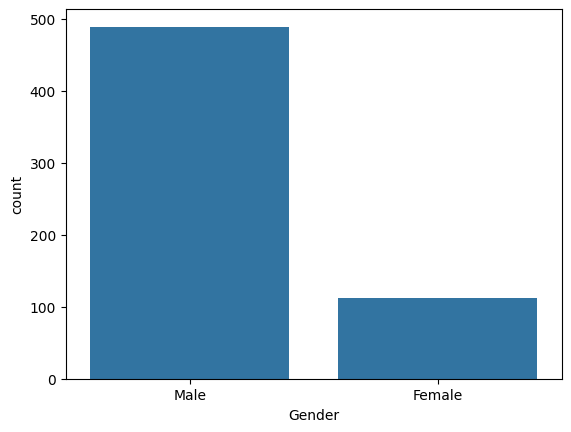

In [59]:
#Simple visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'Gender', data = df)
plt.show()

Text(0.5, 1.0, 'Average ApplicantIncome and CoapplicantIncome by Gender')

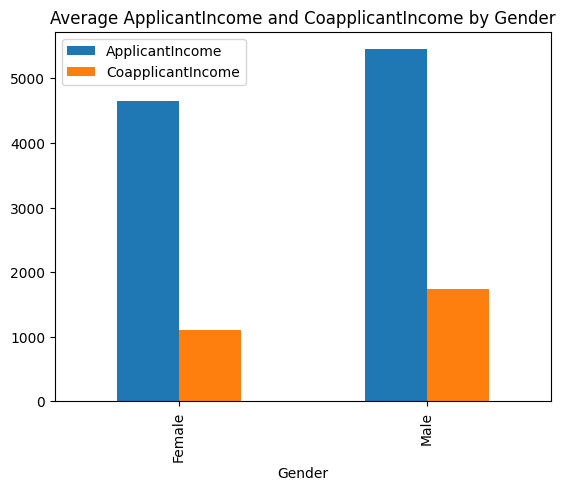

In [70]:
import matplotlib.pyplot as plt

df.groupby('Gender')[['ApplicantIncome', 'CoapplicantIncome']].mean().plot(kind = 'bar').set_title('Average ApplicantIncome and CoapplicantIncome by Gender')

<Axes: ylabel='count'>

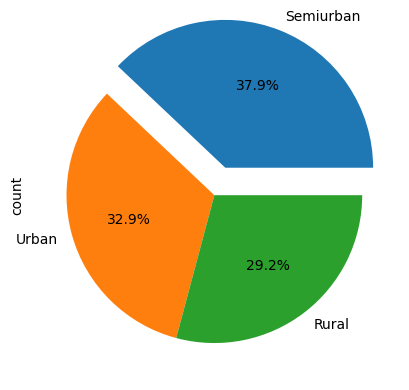

In [83]:
#Pie chart for property area
#Autopct means auto percentage
#valuecounts - counts the frequency of unique values in a Series or DataFrame column (pandas function)
import pandas as pd
import seaborn as sns
import matplotlib as plt

explode = [0.2,0,0]
df ['Property_Area'].value_counts().plot(kind = 'pie',explode = explode, autopct = '%1.1f%%')